In [1]:
import csv
import os
import sys
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/nicholas/pas-complexity/Data/Total Proteome/0000_BAYESOPT_PAS_100_RUNS.csv')
df = df.iloc[0:1000]
df.head()

,Iteration,Architecture,Thetas,Ks,Objective,Relative Yield
0,1,"[[0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 0, 0...","[9.91886575069396e-6, 7.455454875569657e-5, 6....","[4.5067957237385346e-5, 5.0913740623346565e-5,...",0.146758,0.967177
1,2,"[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0...","[8.209261983361577e-6, 6.732903465216672e-5, 2...","[8.390564510174775e-5, 3.9531733223658565e-5, ...",0.082440,1.191336
2,3,"[[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0...","[3.745546461832666e-5, 7.831430473689228e-5, 5...","[7.365075101971005e-5, 4.1947799310993245e-5, ...",0.031693,1.118221
3,4,"[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0...","[9.744144838908318e-5, 6.804741916150454e-5, 5...","[5.584941221023993e-6, 3.5578369464874694e-5, ...",0.328285,0.914783
4,5,"[[0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 0, 0...","[6.629279092768485e-5, 5.010119758452737e-5, 4...","[6.19998782857223e-5, 8.705277603773637e-5, 0....",0.244655,0.951495


In [3]:
#print proportion of run smaller than 10E5
print('Proportion of runs smaller than 10E5:', (df['Objective'] < 10E5).mean())

Proportion of runs smaller than 10E5: 1.0


/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

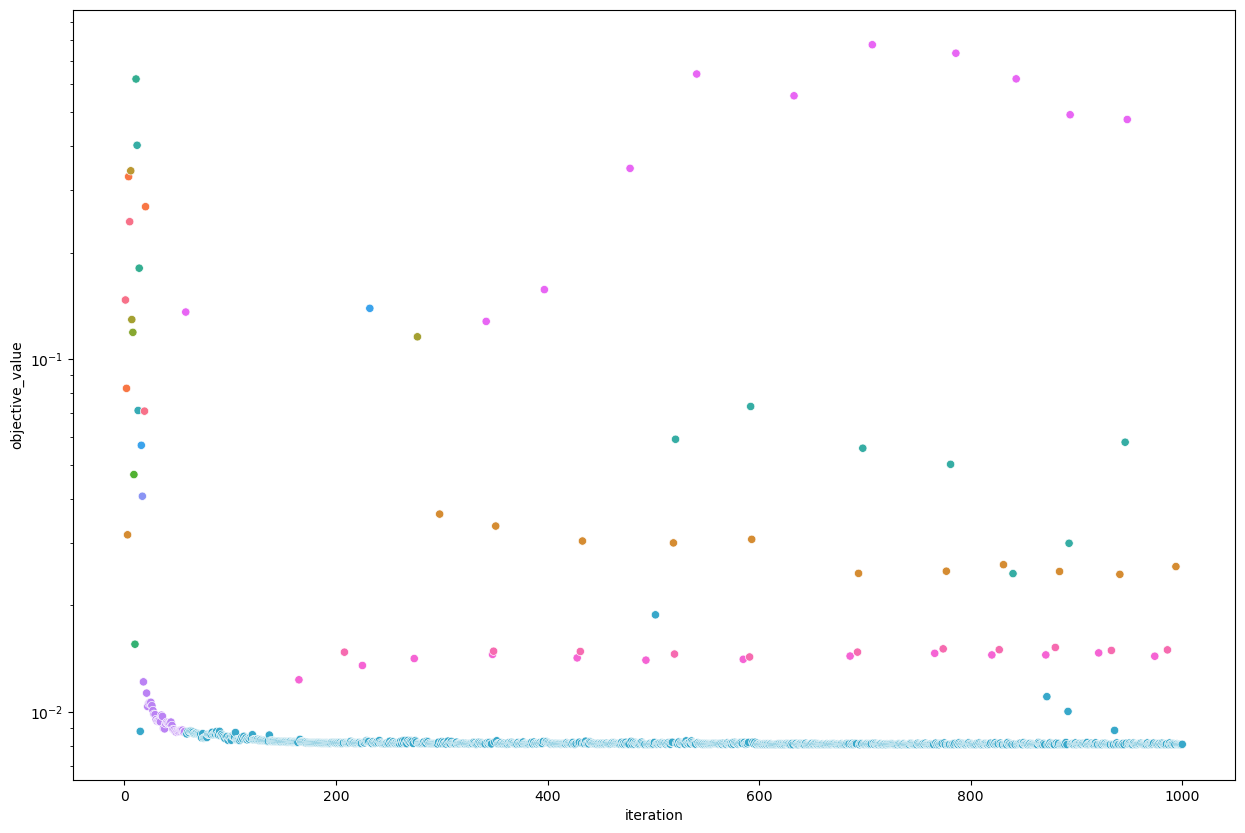

In [4]:
#make the color different for each unique architecture
sns.scatterplot(x='Iteration', y='Objective', hue='Architecture', data=df, legend=False)
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('objective_value')
# plt.plot(df['Iteration'], df['Objective'].expanding().min(), color='black', linestyle='--')
plt.gcf().set_size_inches(15, 10)

/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

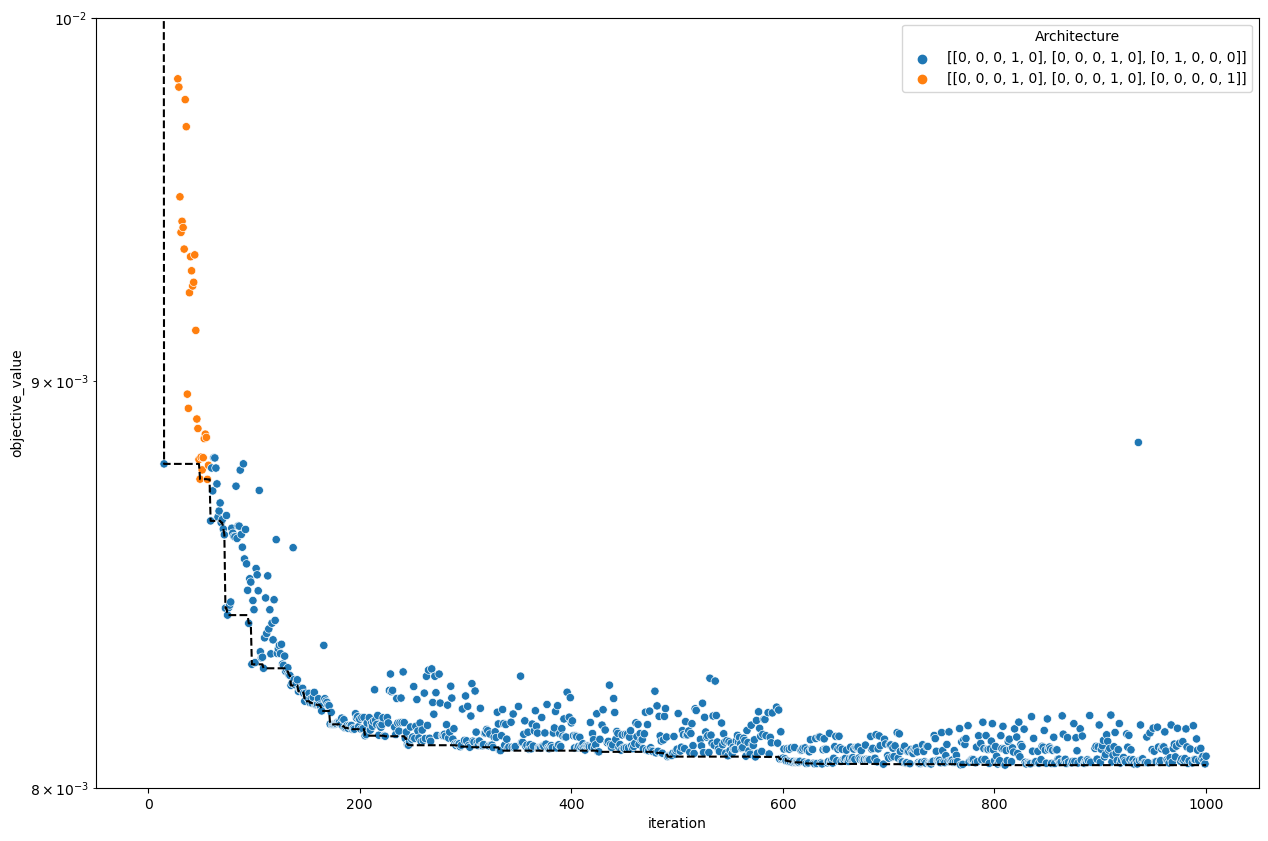

In [5]:
data_filtered = df[df['Objective'] < 1E-2]

sns.scatterplot(x='Iteration', y='Objective', hue='Architecture', data=data_filtered)
plt.yscale('log')
plt.ylim(8E-3, 1E-2)
plt.xlabel('iteration')
plt.ylabel('objective_value')
plt.gcf().set_size_inches(15, 10)
plt.plot(df['Iteration'], df['Objective'].expanding().min(), color='black', linestyle='--')


In [6]:
#find index of lowest objective value. Grab the architecture, thetas, and ks
min_index = df['Objective'].idxmin()

print(df.loc[min_index, 'Architecture'])
print(df.loc[min_index, 'Thetas'])
print(df.loc[min_index, 'Ks'])

[[0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0]]
[6.293037673265234e-5, 9.760433757499482e-5, 4.122882305996626e-5, 9.998588422554795e-5, 4.713575005036493e-5, 7.060974832065139e-6]
[8.526171617626419e-5, 4.5683431197315866e-5, 0.0007206428111921967, 9.686255671326462e-5, 5.020387998034279e-6, 9.509999800797355e-5, 9.995976465856728e-5, 5.088059537092068e-6, 5.000212339526966e-6, 6.242400337669661e-5]


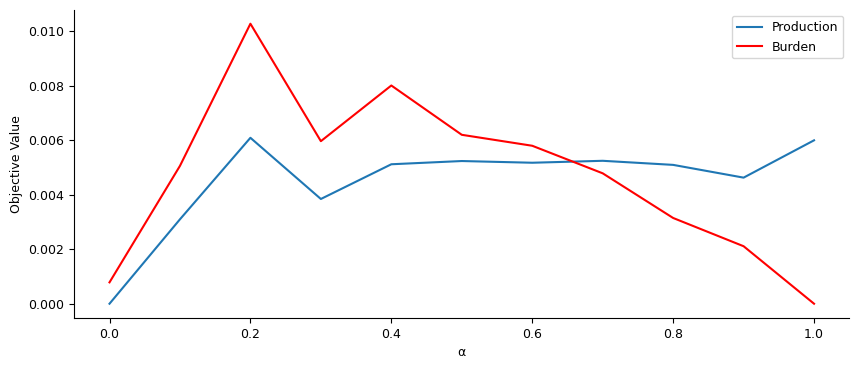

In [9]:
graph_min = [[0.0, 0.0, 0.0007835026657477401], [0.1,0.00309672186526278,0.00505670525497086], [0.2,0.0060863037720134405,0.01027050537582852], [0.3, 0.00384188990547846,0.005962552394701099], [0.4, 0.00511540262282368,0.008004630081863081], [0.5, 0.0052339455635892805, 0.006196131127350361], [0.6, 0.005171317548299021, 0.00579417668077928], [.7, 0.00524260082124854, 0.00478353312285386], [.8, 0.0050927095744053, 0.00314504963648348], [.9, 0.0046248675119905805, 0.0021090066697683004], [1.0, 0.00599389078857326, 0.0]]

x = [i[0] for i in graph_min]
y1 = [i[1] for i in graph_min]
y2 = [i[2] for i in graph_min]

fig, ax = plt.subplots(figsize=(10, 4))
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.rcParams.update({'font.size': 9})
plt.plot(x, y1, label='Production')
plt.plot(x, y2, label='Burden', color='r')
plt.xlabel('α')
plt.ylabel('Objective Value')
plt.legend()
# plt.savefig('figure 2.png')
plt.show()

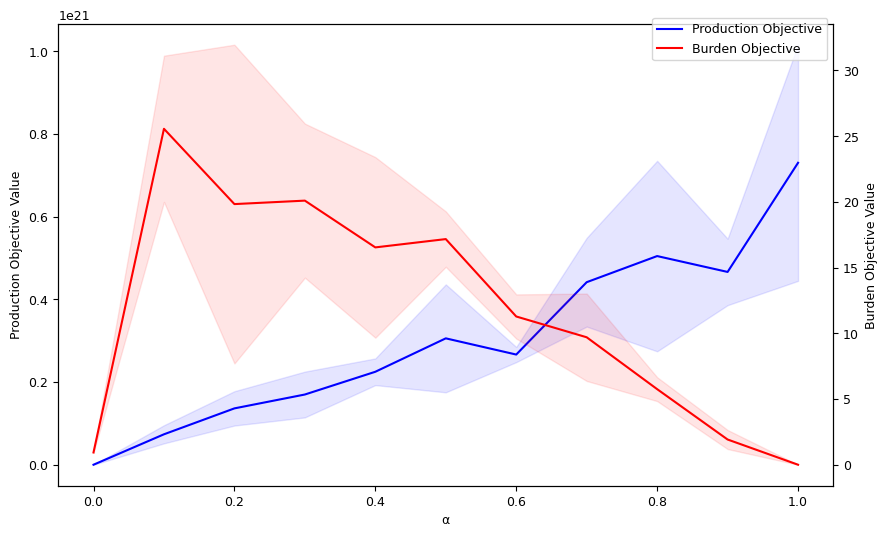

In [8]:
#iterate across every file in /home/nicholas/pas-complexity/not normalized

dump = []

for filename in os.listdir('/home/nicholas/pas-complexity/not normalized'):
    if filename.endswith('.csv'):
        df = pd.read_csv('/home/nicholas/pas-complexity/not normalized/' + filename)
        min_index = df['Objective'].idxmin()
        j1, j2 = [df.loc[min_index, 'J1'], df.loc[min_index, 'J2']]
        dump.append([str(filename)[0:3], j1, j2])

average_j1 = [[],[],[],[],[],[],[],[],[],[],[]]
average_j2 = [[],[],[],[],[],[],[],[],[],[],[]]
for d in dump:
    if d[0] == '0.0':
        average_j1[0].append(d[1])
        average_j2[0].append(d[2])
    elif d[0] == '0.1':
        average_j1[1].append(d[1])
        average_j2[1].append(d[2])
    elif d[0] == '0.2':
        average_j1[2].append(d[1])
        average_j2[2].append(d[2])
    elif d[0] == '0.3':
        average_j1[3].append(d[1])
        average_j2[3].append(d[2])
    elif d[0] == '0.4':
        average_j1[4].append(d[1])
        average_j2[4].append(d[2])
    elif d[0] == '0.5':
        average_j1[5].append(d[1])
        average_j2[5].append(d[2])
    elif d[0] == '0.6':
        average_j1[6].append(d[1])
        average_j2[6].append(d[2])
    elif d[0] == '0.7':
        average_j1[7].append(d[1])
        average_j2[7].append(d[2])
    elif d[0] == '0.8':
        average_j1[8].append(d[1])
        average_j2[8].append(d[2])
    elif d[0] == '0.9':
        average_j1[9].append(d[1])
        average_j2[9].append(d[2])
    else:
        average_j1[10].append(d[1])
        average_j2[10].append(d[2])

graph1 = []
graph2 = []
index = 0
for a in average_j1:
#make a confidence interval for each a in average_j1 and average_j2
    average = np.mean(a)
    z = 1.96
    n = 5
    pop_std = np.std(a)
    lower = average - z * (pop_std/np.sqrt(n))
    upper = average + z * (pop_std/np.sqrt(n))
    graph1.append([index/10, lower, upper, average])
    index += 1

index = 0
for a in average_j2:
    average = np.mean(a)
    z = 1.96
    n = 5
    pop_std = np.std(a)
    lower = average - z * (pop_std/np.sqrt(n))
    upper = average + z * (pop_std/np.sqrt(n))
    graph2.append([index/10, lower, upper, average])
    index += 1

#graph both confidence intervals
x1 = [i[0] for i in graph1]
y1 = [i[3] for i in graph1]
y1_lower = [i[1] for i in graph1]
y1_upper = [i[2] for i in graph1]

x2 = [i[0] for i in graph2]
y2 = [i[3] for i in graph2]
y2_lower = [i[1] for i in graph2]
y2_upper = [i[2] for i in graph2]

#plot both scales on the same graph

fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
ax.plot(x1,y1, color='b', label='Production Objective')
ax.fill_between(x1, (y1_lower), (y1_upper), color='b', alpha=.1)
ax2.plot(x2,y2, color='r', label='Burden Objective')
ax2.fill_between(x2, (y2_lower), (y2_upper), color='r', alpha=.1)
#titles
ax.set_xlabel('α')
ax.set_ylabel('Production Objective Value')
ax2.set_ylabel('Burden Objective Value')
fig.legend(bbox_to_anchor=(0.9, 0.9))

plt.show()
